In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import pyplot
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [2]:
airline=pd.read_excel('Airlines_Data.xlsx',header=0,parse_dates=True)

In [3]:
a=airline.fillna('Passengers')

In [4]:
a

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
airline.duplicated().value_counts()

False    96
dtype: int64

In [9]:
airline.isnull().value_counts()

Month  Passengers
False  False         96
dtype: int64

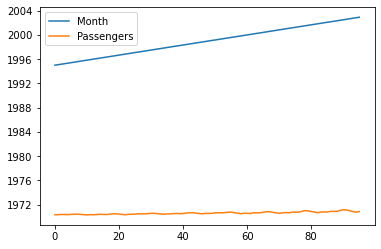

In [10]:
airline.plot()
pyplot.show()
#This graph show that there is upward multiplicative seasonality.

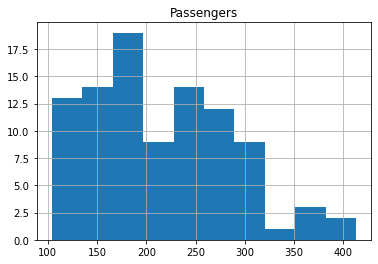

In [8]:
airline.hist()
pyplot.show()
# we can say that the data is some what normally distributed.

<AxesSubplot:ylabel='Density'>

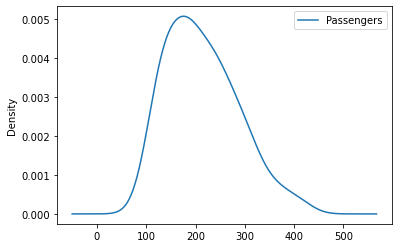

In [9]:
airline.plot(kind='kde')
# Data is some what normally distributed 

<AxesSubplot:>

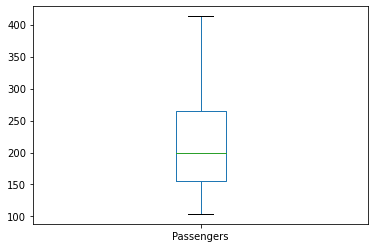

In [29]:
airline.plot(kind='box')

In [10]:
from numpy import log
from pandas import DataFrame
from numpy import sqrt
dataframe=DataFrame(airline.values)
dataframe.columns=['Passengers']
dataframe['Passengers']=log(sqrt(dataframe['Passengers']))

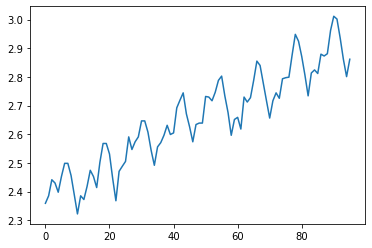

In [12]:

pyplot.plot(dataframe['Passengers'])

(array([ 7.,  9.,  8., 13., 14., 15., 11., 10.,  5.,  4.]),
 array([2.32219545, 2.39114828, 2.46010112, 2.52905395, 2.59800679,
        2.66695962, 2.73591246, 2.80486529, 2.87381813, 2.94277096,
        3.0117238 ]),
 <BarContainer object of 10 artists>)

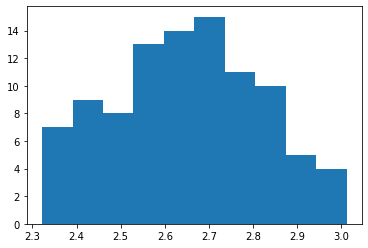

In [13]:
pyplot.hist(dataframe['Passengers'])
# we can see here that data is normally distributed.

<AxesSubplot:ylabel='Density'>

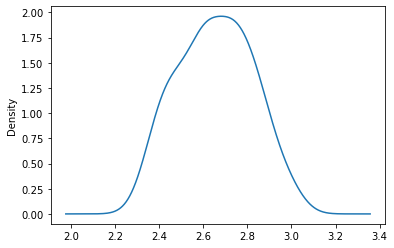

In [14]:
dataframe['Passengers'].plot(kind='kde')

# from density plot also we can say that data is normally distributed and we can apply ARIMA model to it.

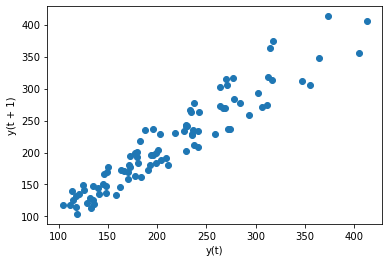

In [16]:
from pandas.plotting import lag_plot
lag_plot(airline)
plt.show()

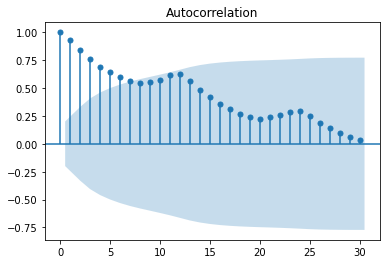

In [17]:
#plottign ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airline,lags=30)
pyplot.show()
# from this graph we got K=1 which gives us the best r vaalue

In [ ]:
# we have to apply interpolation technique to make the data normally distributed.
# But we can see that there is upward linear seasonality in the data set so if there is seasonality we cannot use arima model
# so we ahve to go with the

In [18]:
airline

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [19]:
# Holts winter method exponential smoothing is used for forecasting if there is trend and seasonality

Train=airline.head(84)
Test=airline.tail(12)

In [20]:
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [21]:
Test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


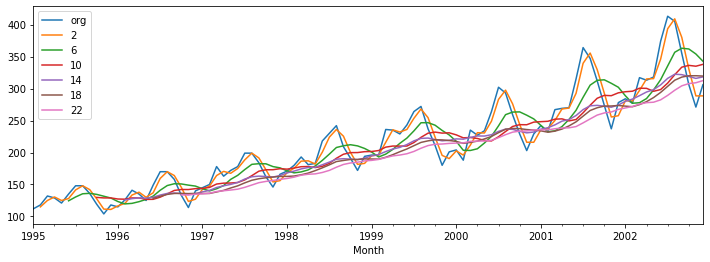

In [22]:
#Moving Average
plt.figure(figsize=(12,4))
airline.Passengers.plot(label='org')
for i in range(2,24,4):
    airline['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

In [ ]:
# we got max similarity with the window value=2 


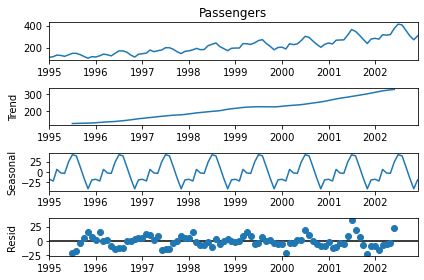

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal=seasonal_decompose(airline.Passengers,period=12)
seasonal.plot()
plt.show()

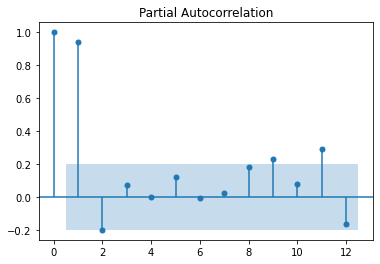

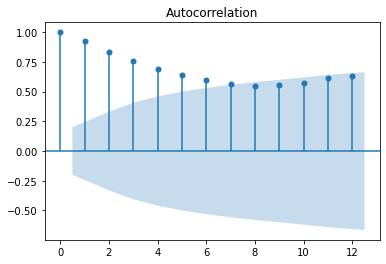

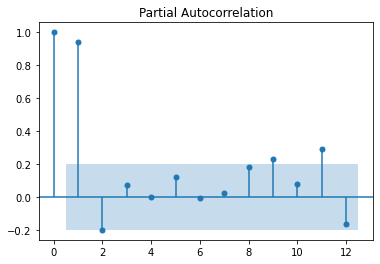

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airline.Passengers,lags=12)
tsa_plots.plot_pacf(airline.Passengers,lags=12)

In [11]:
# Evalution metric RMSE

def RMSE(pred,org):
    temp=np.mean((pred-org)**2)
    return np.sqrt(temp)     

In [12]:
#simple exponential method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
ses_model_pred=ses_model.predict(start=Test.index[0],end=Test.index[-1])
RMSE(ses_model_pred,Test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


64.84476396990497

In [13]:
#holts model
from statsmodels.tsa.holtwinters import Holt
hwe_model=Holt(Train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
hwe_pred=hwe_model.predict(start=Test.index[0],end=Test.index[-1])
RMSE(hwe_pred,Test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-13-2be079e79bed>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hwe_model=Holt(Train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)


95.76674452675303

In [53]:
# holts winter exponential smoothing with additive seasonality and linear trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model=ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_model_add=hwe_model.predict(start=Test.index[0],end= Test.index[-1])
RMSE(pred_hwe_model_add,Test.Passengers)

28.801980839200045

In [15]:
#holts winter exponential smoothing with multiplicatuve seasonality
hwe_model=ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_model=hwe_model.predict(start=Test.index[0],end=Test.index[-1])
RMSE(pred_hwe_model,Test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


12.91963305938806

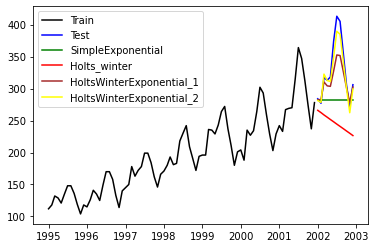

In [55]:
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(ses_model_pred.index, ses_model_pred, label='SimpleExponential',color="green")
plt.plot(hwe_pred.index, hwe_pred, label='Holts_winter',color="red")
plt.plot(pred_hwe_model_add.index,pred_hwe_model_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_model.index,pred_hwe_model,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')


# from this model we conclude that best model is holt winter exponential smoothing with multiplicative seasonality
Visualization of Forecasted values for Test data set using different methods

In [28]:
# splitting the data set
from pandas import read_excel
airline1=read_excel('Airlines_Data.xlsx',header=0,index_col=0,parse_dates=True)


In [29]:
airline1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [12]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [39]:
# separate out a validation dataset
split_point = len(airline1) - 12
dataset, validation = airline1[0:split_point], airline1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


#Persistence base model

In [40]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train1 = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]



In [32]:
train.shape

(42,)

In [33]:
test.shape

(42,)

>predictions=218.000, expected=230.000
>predictions=230.000, expected=242.000
>predictions=242.000, expected=209.000
>predictions=209.000, expected=191.000
>predictions=191.000, expected=172.000
>predictions=172.000, expected=194.000
>predictions=194.000, expected=196.000
>predictions=196.000, expected=196.000
>predictions=196.000, expected=236.000
>predictions=236.000, expected=235.000
>predictions=235.000, expected=229.000
>predictions=229.000, expected=243.000
>predictions=243.000, expected=264.000
>predictions=264.000, expected=272.000
>predictions=272.000, expected=237.000
>predictions=237.000, expected=211.000
>predictions=211.000, expected=180.000
>predictions=180.000, expected=201.000
>predictions=201.000, expected=204.000
>predictions=204.000, expected=188.000
>predictions=188.000, expected=235.000
>predictions=235.000, expected=227.000
>predictions=227.000, expected=234.000
>predictions=234.000, expected=264.000
>predictions=264.000, expected=302.000
>predictions=302.000, exp

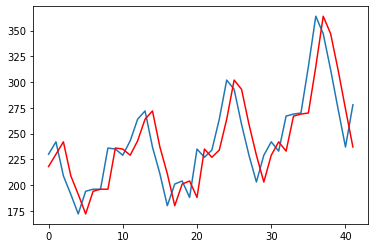

In [34]:
history=[x for x in train]
predictions=list()

for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
#Observations
    obs=test[i]
    history.append(obs)
    print('>predictions=%.3f, expected=%.3f' % (yhat,obs))
    
# find error
rmse=np.sqrt(mean_squared_error(test,predictions))
print('RMSE=%.3f'% rmse)

pyplot.plot(test)
pyplot.plot(predictions,color='red')
               

In [35]:
#Arima hyperparameters
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [62]:
#from sklearn.model_selection import GridSearchCV

#model=ARIMA()
#param_grid=[{'p':[0,1,2],'d':[0,1,2],'q':[0,1,2]}]
#gsv=GridSearchCV(model,param_grid,cv=5)
#gsv.fit(test,predictions)

In [38]:
#evaluate combinations of p,q and d values for arima model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [41]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.790
ARIMA(0, 1, 0) RMSE=26.206
ARIMA(0, 1, 1) RMSE=25.582
ARIMA(0, 1, 2) RMSE=28.099
ARIMA(0, 2, 0) RMSE=32.545
ARIMA(0, 2, 1) RMSE=26.939
ARIMA(0, 2, 2) RMSE=26.175
ARIMA(1, 0, 0) RMSE=26.445
ARIMA(1, 0, 1) RMSE=25.611
ARIMA(1, 0, 2) RMSE=387.651
ARIMA(1, 1, 0) RMSE=25.940
ARIMA(1, 2, 0) RMSE=31.784
ARIMA(2, 0, 0) RMSE=25.991
ARIMA(2, 1, 0) RMSE=25.659
ARIMA(2, 2, 0) RMSE=30.766
Best ARIMA(0, 1, 1) RMSE=25.582


#Building a model based on optimize values

In [42]:
# load the data set
train=read_csv('dataset.csv',header=0,index_col=0,parse_dates=True)#index_col is 0 instead of None (take first column as index by default) header is None instead of 0 (the first row is not used as the column names)
X=train.values
X=X.astype('float32')

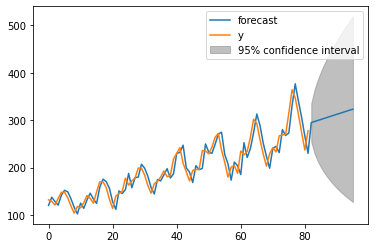

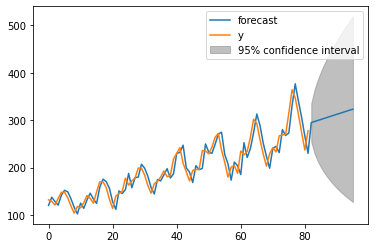

In [48]:
model=ARIMA(X,order=(0,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,96)

In [49]:
#findin error on test data
val=pd.read_csv('validation.csv',header=None)#A few key points:a) header=0 means you have the names of columns in the first row in the file and if you don't you will have to specify header=None
rmse=sqrt(mean_squared_error(val[1],forecast))
rmse

49.97760638286947

# Cobining train and test dataset

In [51]:
data=pd.read_excel('Airlines_Data.xlsx',header=0,index_col=0,parse_dates=True)
X=data.values
X=X.astype('float32')

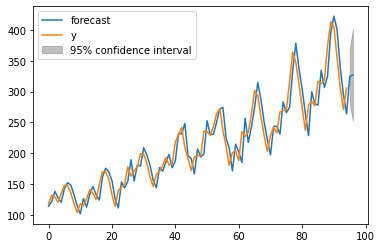

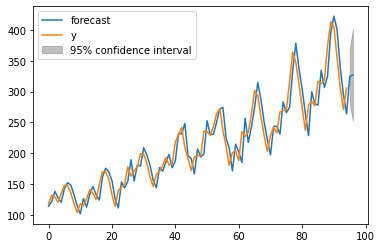

In [54]:
model=ARIMA(X,order=(0,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,97)

In [55]:
forecast

array([324.73102051, 326.94357324, 329.15612596, 331.36867869,
       333.58123141, 335.79378413, 338.00633686, 340.21888958,
       342.4314423 , 344.64399503, 346.85654775, 349.06910047])

In [138]:
a=pd.read_excel('Airlines_Data.xlsx')

In [139]:
a

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [140]:
#Model based techique


a["month"] = a.Month.dt.strftime("%b") # month extraction
a['year']=a.Month.dt.strftime('%Y')

In [141]:
a


,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [142]:
a

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [143]:
a1=pd.get_dummies(a['month'])

In [145]:
a1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

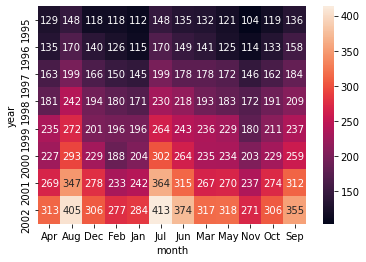

In [146]:
# Plotting heat map
heatmap_month_year=pd.pivot_table(data=a,values='Passengers',columns='month',index='year',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_month_year,annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

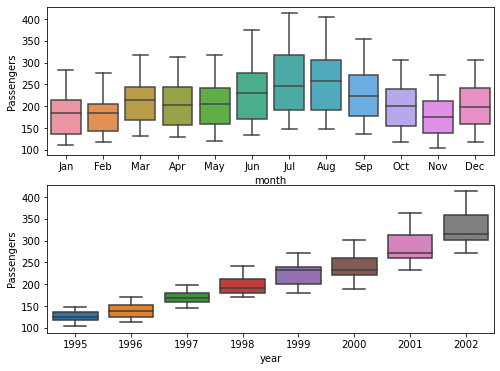

In [147]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=a)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=a)

In [153]:
a2=pd.concat([a,a1],axis=1)
a2

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [159]:
t=np.arange(1,97)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [160]:
a2['t']=t
a2

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95


In [161]:
a2['t_square']=a2['t']**a2['t']
a2

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,27
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,256
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,1790517325
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,1916190623


In [162]:
a2['logpass']=np.log(a2['Passengers'])
a2

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,logpass
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,27,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,256,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,3125,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,0,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,1790517325,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,0,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,1916190623,5.602119


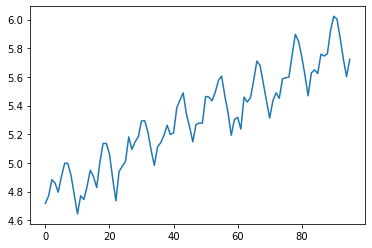

In [163]:
plt.plot(a2['logpass'])
pyplot.show()

In [164]:
Train=a2.head(84)
Test=a2.tail(12)

In [165]:
Train

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,logpass
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,27,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,256,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,3125,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,0,1,0,0,0,0,0,0,0,0,0,0,80,0,5.849325
80,2001-09-01,312,Sep,2001,0,0,0,0,0,0,0,0,0,0,0,1,81,-1090846383,5.743003
81,2001-10-01,274,Oct,2001,0,0,0,0,0,0,0,0,0,0,1,0,82,0,5.613128
82,2001-11-01,237,Nov,2001,0,0,0,0,0,0,0,0,0,1,0,0,83,-1095175861,5.468060


In [166]:
Test

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,logpass
84,2002-01-01,284,Jan,2002,0,0,0,0,1,0,0,0,0,0,0,0,85,-741017211,5.648974
85,2002-02-01,277,Feb,2002,0,0,0,1,0,0,0,0,0,0,0,0,86,0,5.624018
86,2002-03-01,317,Mar,2002,0,0,0,0,0,0,0,1,0,0,0,0,87,-1465220441,5.758902
87,2002-04-01,313,Apr,2002,1,0,0,0,0,0,0,0,0,0,0,0,88,0,5.746203
88,2002-05-01,318,May,2002,0,0,0,0,0,0,0,0,1,0,0,0,89,376283545,5.762051
89,2002-06-01,374,Jun,2002,0,0,0,0,0,0,1,0,0,0,0,0,90,0,5.924256
90,2002-07-01,413,Jul,2002,0,0,0,0,0,1,0,0,0,0,0,0,91,-763055485,6.023448
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,0,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,1790517325,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,0,5.723585


In [167]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

In [168]:
#Exponential

Exp = smf.ols('logpass~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


46.05736110315619

In [170]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.03081344804394

In [171]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [172]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.65557962737138

In [173]:
##Multiplicative Seasonality

Mul_sea = smf.ols('logpass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708618

In [174]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('logpass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323684

In [175]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,35.655580
1,rmse_Exp,46.057361
2,rmse_Quad,53.030813
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [ ]:
#Data set has multiplicative additive seasonality